In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
import sys
sys.path.append("/home/htc/pkruzikova/SCRATCH/hackathon-2024")

In [3]:
import pyiron_hackathon

Welcome to the pyironhackathon 2024


In [4]:
from pyiron_workflow import Workflow
from typing import Optional

In [5]:
from K_Griffith import rotate_elasticity_tensor, theor_K_griffith_plane_strain, anisotropic_crack_params, displace_atoms_crack_aniso
from creator_crystal_structure import create_single_species
from k_controlled_crack import cut_cylinder
from boundary_layers import outer_cylinder
from visualize_structures import ase_view

In [6]:
wf = Workflow('crack')
wf.C = rotate_elasticity_tensor(c11=3.261, c12=1.276, c13=1.276, c33=3.261, c44=1.002, crystal='bcc', 
                                  x_indices='1 0 0', y_indices=[0,1,0], z_indices='0 0 1')
wf.K_G = theor_K_griffith_plane_strain(C=wf.C, gamma_s=3.933)
wf.struct = create_single_species(crystal='bcc', lattice_constant_a=3.16, lattice_constant_c=0,
                                  x_indices=[0, -1, 0], y_indices=[1, 0, 0], z_indices=[0, 0, 1],
                                  x_repetition=200, y_repetition=200, z_repetition=4, species='W',
                                  x_pbc=False, y_pbc=False, z_pbc=True)
wf.cylinder = cut_cylinder(structure=wf.struct, xcenter=315.21, ycenter=315.21, radius=300)
wf.boundary = outer_cylinder(structure=wf.cylinder, radius=285)
wf.params = anisotropic_crack_params(C=wf.C)
wf.cracked_struct = displace_atoms_crack_aniso(atoms=wf.boundary, K_I=2*wf.K_G, K_II=0, K_III=0, crack_params=wf.params)
# wf.cracked_struct = displace_atoms_crack_aniso(atoms=wf.cylinder, K_I=wf.K_G, K_II=0, K_III=0, 
#                                                A=wf.params.outputs.A, B_inv=wf.params.outputs.B_inv, p=wf.params.outputs.p)
wf.view = ase_view(wf.cracked_struct)

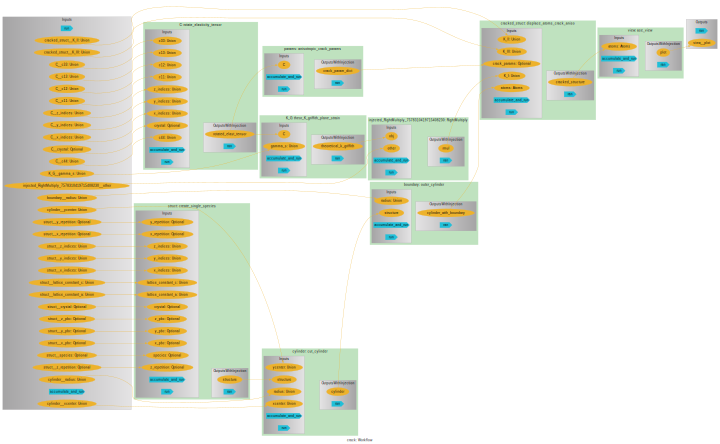

In [7]:
wf.draw(size=(10,10))

In [8]:
wf()

{'view__plot': HBox(children=(NGLWidget(), VBox(children=(Dropdown(description='Show', options=('All', 'Be', 'Li'), value='All'), Dropdown(description='Color scheme', index=9, options=(' ', 'picking', 'random', 'uniform', 'atomindex', 'residueindex', 'chainindex', 'modelindex', 'sstruc', 'element', 'resname', 'bfactor', 'hydrophobicity', 'value', 'volume', 'occupancy'), value='element'), FloatSlider(value=0.5, description='Ball size', max=1.5, step=0.01)))))}

In [9]:
wf.outputs.view__plot.value